#### statsmodles 라이브러리를 이용한 GOOGL 데이터셋 예측

In [1]:
import pandas as pd


In [2]:
data=pd.read_csv("data/GOOGL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


In [3]:
data["Date"]=data.index
data.reset_index(drop=True, inplace=True)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,0,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,1,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,3,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,4,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


In [5]:
data=data[["Date","Close"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    253 non-null    int64  
 1   Close   253 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.1 KB


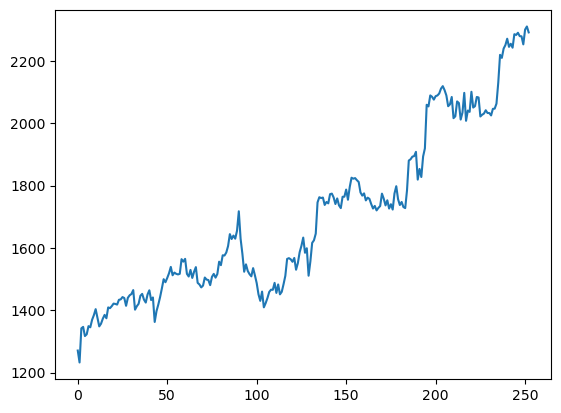

In [6]:
import matplotlib.pyplot as plt
plt.plot(data["Date"], data["Close"])

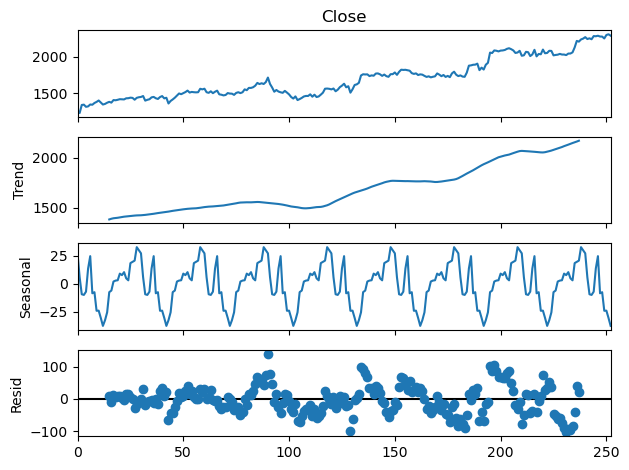

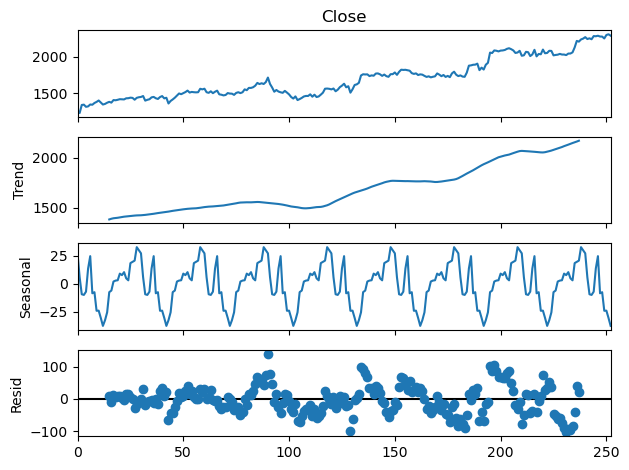

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data["Close"], period=30)
result.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

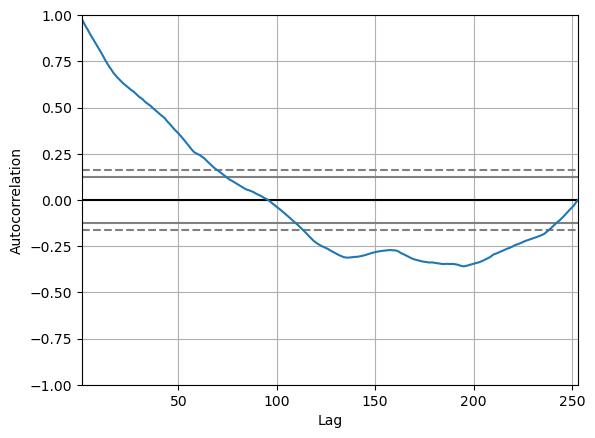

In [8]:
#pd.plotting.autocorrelation_plot() 함수는 Pandas에서 제공하는 함수로, 시계열 데이터의 자기상관성(Autocorrelation)을 시각화하는 데 사용됩니다. 
pd.plotting.autocorrelation_plot(data["Close"])


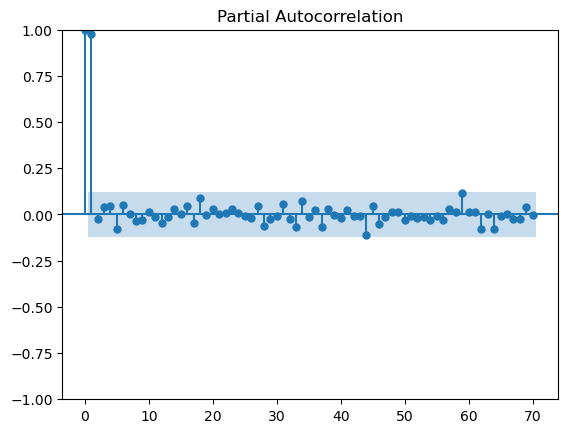

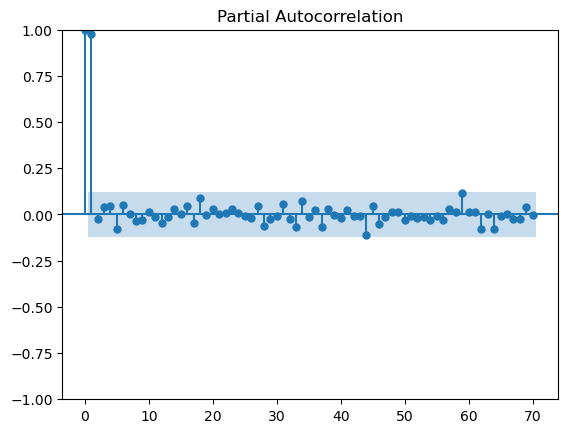

In [9]:
#시계열 데이터의 부분 자기상관 함수(Partial Autocorrelation Function, PACF)를 시각화합니다.
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"],lags=70)

In [10]:
p, d, q =5,1,2
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(data["Close"], order=(p, d, q))
fitted=model.fit()
predicts=fitted.predict()
predicts=fitted.predict(len(data), len(data)+10)      #predicts는 예측된 시계열 값을 포함하는 시리즈입니다. 이 결과는 data["Close"] 시계열의 끝부터 10일 후까지의 예측 값을 나타냅니다.
predicts

253    2289.338554
254    2295.209371
255    2289.088297
256    2281.176607
257    2285.965150
258    2291.601874
259    2289.031316
260    2286.252375
261    2288.803133
262    2290.229473
263    2288.036409
Name: predicted_mean, dtype: float64

<Axes: >

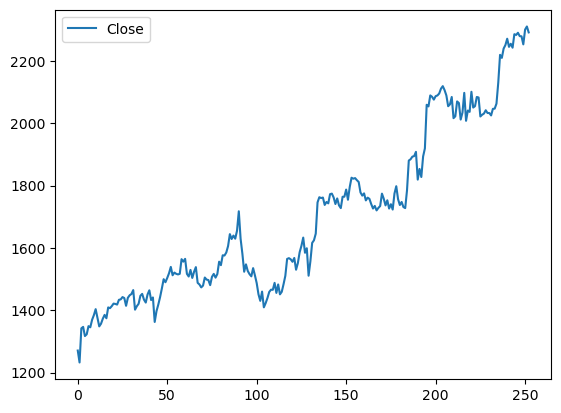

In [11]:
data["Close"].plot(legend=True)

<Axes: >

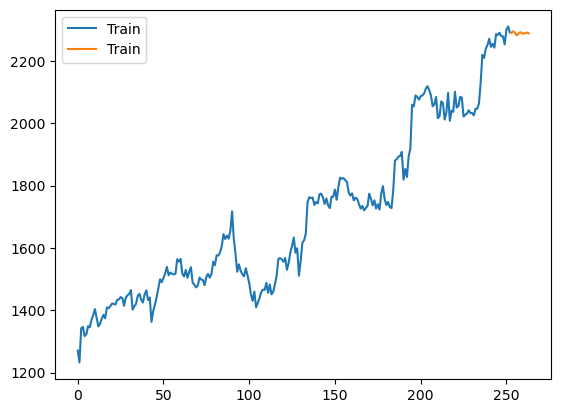

In [12]:
data["Close"].plot(legend=True, label="Train")
predicts.plot(legend=True, label="Train")

C:\Users\user\anaconda3\envs\torch-book\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\envs\torch-book\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\user\anaconda3\envs\torch-book\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

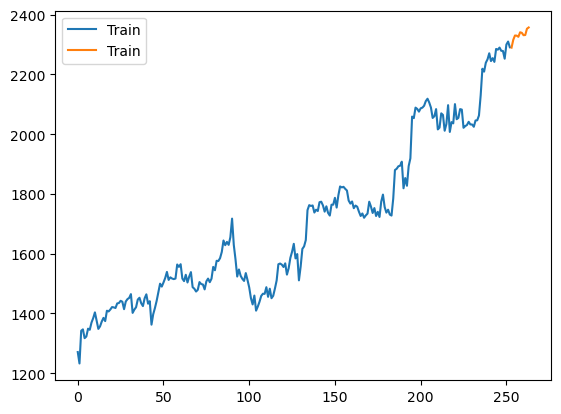

In [13]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(data["Close"], order=(p,d,q), seasonal_order=(p,d,q,12))
fitted = model.fit()
predicts = fitted.predict(len(data), len(data)+10)
data["Close"].plot(legend=True, label="Train")
predicts.plot(legend=True, label="Train")